21. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy.

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
# We'll use 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the SVM Classifier
# We'll start with a linear kernel, which is often a good baseline
svm_classifier = SVC(kernel='linear', random_state=42)

# Train (fit) the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the SVM Classifier on the Iris dataset: {accuracy:.4f}")

Accuracy of the SVM Classifier on the Iris dataset: 1.0000


22. Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies.

In [2]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler # Good practice for SVM, especially RBF

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# It's good practice to scale features for SVM, especially with RBF kernel
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train SVM with Linear Kernel ---
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy with Linear Kernel: {accuracy_linear:.4f}")

# --- Train SVM with RBF Kernel ---
# 'gamma' is a parameter for RBF kernel. 'scale' is a good default.
svm_rbf = SVC(kernel='rbf', random_state=42, gamma='scale')
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy with RBF Kernel: {accuracy_rbf:.4f}")

# --- Compare Accuracies ---
print("\n--- Comparison ---")
if accuracy_rbf > accuracy_linear:
    print(f"RBF Kernel performed better by {accuracy_rbf - accuracy_linear:.4f} accuracy points.")
elif accuracy_linear > accuracy_rbf:
    print(f"Linear Kernel performed better by {accuracy_linear - accuracy_rbf:.4f} accuracy points.")
else:
    print("Both kernels performed equally well.")

Accuracy with Linear Kernel: 0.9815
Accuracy with RBF Kernel: 0.9815

--- Comparison ---
Both kernels performed equally well.


23. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE).

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing # A commonly used housing dataset
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler # Essential for SVR

# Load the California Housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features - SVR is very sensitive to feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVR model
# RBF kernel is a good general choice for SVR.
# C (regularization) and epsilon (tube around the regression line) are important parameters.
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)

# Train the SVR model
svr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test_scaled)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE) of the SVR model: {mse:.4f}")

KeyboardInterrupt: 

24. Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary.

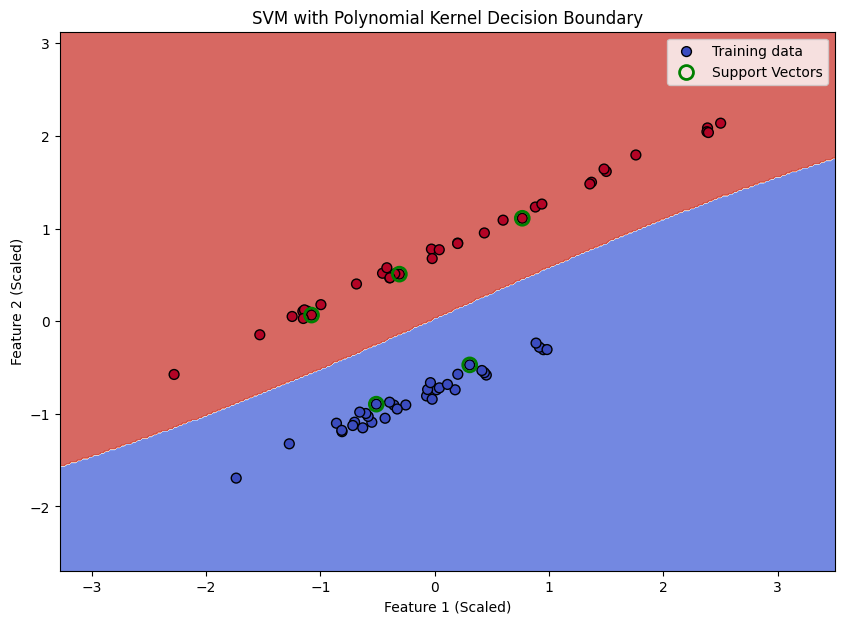

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification # Create a simple synthetic dataset
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler # Important for SVM

# Generate a synthetic dataset with 2 features for easy visualization
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM with Polynomial Kernel
# degree: degree of the polynomial kernel function (e.g., 2 for quadratic, 3 for cubic)
# coef0: independent term in the kernel function. It is often set to 1.
svm_poly = SVC(kernel='poly', degree=3, coef0=1, random_state=42)
svm_poly.fit(X_train_scaled, y_train)

# --- Visualize the Decision Boundary ---
# Create a mesh to plot the decision boundary
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the class for each point in the mesh
Z = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm) # Decision regions
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=50, edgecolors='k', label='Training data')
plt.scatter(svm_poly.support_vectors_[:, 0], svm_poly.support_vectors_[:, 1], s=100,
            facecolors='none', edgecolors='green', linewidths=2, label='Support Vectors') # Highlight Support Vectors

plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.title('SVM with Polynomial Kernel Decision Boundary')
plt.legend()
plt.show()

25. Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy.

In [3]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB # Import Gaussian Naive Bayes
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gaussian Naïve Bayes classifier
gnb_classifier = GaussianNB()

# Train the classifier
gnb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = gnb_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of Gaussian Naïve Bayes on Breast Cancer dataset: {accuracy:.4f}")

Accuracy of Gaussian Naïve Bayes on Breast Cancer dataset: 0.9415


26. Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.

In [4]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups # To get the 20 Newsgroups dataset
from sklearn.feature_extraction.text import CountVectorizer # To convert text to numerical features
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB # Multinomial Naive Bayes for text
from sklearn.metrics import accuracy_score, classification_report

# Load a subset of the 20 Newsgroups dataset for faster demonstration
# We'll pick a few categories related to computers and religion
categories = ['alt.atheism', 'soc.religion.christian',
              'comp.graphics', 'comp.os.ms-windows.misc']

newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

X_train_text = newsgroups_train.data
y_train = newsgroups_train.target
X_test_text = newsgroups_test.data
y_test = newsgroups_test.target

print(f"Training on {len(X_train_text)} samples and testing on {len(X_test_text)} samples.")
print(f"Categories: {newsgroups_train.target_names}")

# Convert text documents to a matrix of token counts (features)
# CountVectorizer tokenizes the text and builds a vocabulary, then counts word occurrences.
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train_text)
X_test_vectors = vectorizer.transform(X_test_text)

print(f"Number of features (unique words) extracted: {X_train_vectors.shape[1]}")

# Initialize and train the Multinomial Naïve Bayes classifier
# alpha=1.0 is default, applies Laplace smoothing to prevent zero probabilities.
mnb_classifier = MultinomialNB(alpha=1.0)
mnb_classifier.fit(X_train_vectors, y_train)

# Make predictions on the test set
y_pred = mnb_classifier.predict(X_test_vectors)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=newsgroups_test.target_names)

print(f"\nAccuracy of Multinomial Naïve Bayes: {accuracy:.4f}")
print("\nClassification Report:\n", report)

# Example prediction for a new document
new_doc = ["windows operating system graphic card issues"]
new_doc_vector = vectorizer.transform(new_doc)
predicted_category_index = mnb_classifier.predict(new_doc_vector)[0]
predicted_category_name = newsgroups_test.target_names[predicted_category_index]
print(f"\nPrediction for '{new_doc[0]}': {predicted_category_name}")

Training on 2254 samples and testing on 1500 samples.
Categories: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'soc.religion.christian']
Number of features (unique words) extracted: 63385

Accuracy of Multinomial Naïve Bayes: 0.6967

Classification Report:
                          precision    recall  f1-score   support

            alt.atheism       0.92      0.88      0.90       319
          comp.graphics       0.50      0.95      0.66       389
comp.os.ms-windows.misc       1.00      0.01      0.02       394
 soc.religion.christian       0.86      0.98      0.92       398

               accuracy                           0.70      1500
              macro avg       0.82      0.71      0.62      1500
           weighted avg       0.82      0.70      0.61      1500


Prediction for 'windows operating system graphic card issues': comp.graphics


27. Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually.

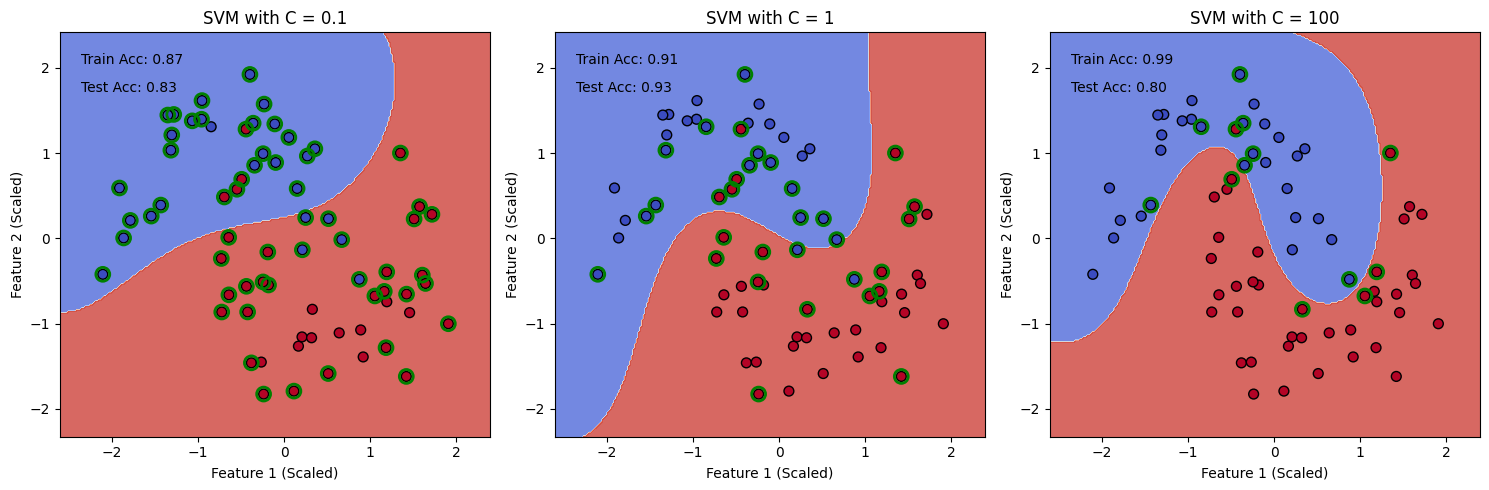


Observation:
 - Smaller C (e.g., 0.1): Larger margin, more misclassifications allowed. Can lead to underfitting.
 - Larger C (e.g., 100): Smaller margin, fewer misclassifications on training data. Can lead to overfitting.
 - C=1 seems to strike a good balance for this dataset, achieving good test accuracy.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons # A good non-linear dataset
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Generate a synthetic dataset that is non-linearly separable
X, y = make_moons(n_samples=100, noise=0.2, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define different C values to compare
c_values = [0.1, 1, 100]

plt.figure(figsize=(15, 5))

# Create a mesh to plot the decision boundary
x_min, x_max = X_train_scaled[:, 0].min() - 0.5, X_train_scaled[:, 0].max() + 0.5
y_min, y_max = X_train_scaled[:, 1].min() - 0.5, X_train_scaled[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

for i, C in enumerate(c_values):
    # Train SVM with RBF kernel for non-linear boundary, varying C
    svm_model = SVC(kernel='rbf', C=C, gamma='scale', random_state=42)
    svm_model.fit(X_train_scaled, y_train)

    # Predict the class for each point in the mesh
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(1, len(c_values), i + 1)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=50, edgecolors='k')
    plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100,
                facecolors='none', edgecolors='green', linewidths=2)
    plt.title(f'SVM with C = {C}')
    plt.xlabel('Feature 1 (Scaled)')
    plt.ylabel('Feature 2 (Scaled)')
    plt.text(0.05, 0.95, f'Train Acc: {svm_model.score(X_train_scaled, y_train):.2f}',
             transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
    plt.text(0.05, 0.88, f'Test Acc: {svm_model.score(X_test_scaled, y_test):.2f}',
             transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')


plt.tight_layout()
plt.show()

print("\nObservation:")
print(" - Smaller C (e.g., 0.1): Larger margin, more misclassifications allowed. Can lead to underfitting.")
print(" - Larger C (e.g., 100): Smaller margin, fewer misclassifications on training data. Can lead to overfitting.")
print(" - C=1 seems to strike a good balance for this dataset, achieving good test accuracy.")

28. Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features.

In [6]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import BernoulliNB # Import Bernoulli Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Create a synthetic dataset with binary features
# Imagine features represent presence (1) or absence (0) of certain words in an email
# Class 0: Not Spam, Class 1: Spam
data = {
    'word_free': [1, 0, 0, 1, 0, 1, 0, 0, 1, 0],
    'word_offer': [1, 0, 0, 1, 0, 1, 0, 1, 1, 0],
    'word_money': [0, 0, 0, 1, 0, 1, 0, 0, 1, 0],
    'word_hello': [0, 1, 1, 0, 1, 0, 1, 0, 0, 1],
    'word_meeting': [0, 0, 1, 0, 1, 0, 1, 0, 0, 1],
    'is_spam': [1, 0, 0, 1, 0, 1, 0, 1, 1, 0] # 1 for spam, 0 for not spam
}
df = pd.DataFrame(data)

X = df[['word_free', 'word_offer', 'word_money', 'word_hello', 'word_meeting']]
y = df['is_spam']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Bernoulli Naïve Bayes classifier
# bin_features=True ensures that features are binarized (values > 0 are treated as 1)
# alpha=1.0 applies Laplace smoothing by default.
bnb_classifier = BernoulliNB(alpha=1.0)

# Train the classifier
bnb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = bnb_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Not Spam', 'Spam'])

print(f"Accuracy of Bernoulli Naïve Bayes: {accuracy:.4f}")
print("\nClassification Report:\n", report)

# Example prediction for a new email
new_email_features = np.array([[1, 1, 0, 0, 0]]) # Has 'free', 'offer', no 'money', 'hello', 'meeting'
prediction = bnb_classifier.predict(new_email_features)[0]
predicted_label = 'Spam' if prediction == 1 else 'Not Spam'
print(f"\nPrediction for new email (features {new_email_features[0]}): {predicted_label}")

Accuracy of Bernoulli Naïve Bayes: 1.0000

Classification Report:
               precision    recall  f1-score   support

    Not Spam       1.00      1.00      1.00         1
        Spam       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


Prediction for new email (features [1 1 0 0 0]): Spam


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


29. Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data.

In [7]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Train SVM on unscaled data ---
svm_unscaled = SVC(kernel='linear', random_state=42)
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)
print(f"Accuracy with unscaled data: {accuracy_unscaled:.4f}")

# --- Apply feature scaling (StandardScaler) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train SVM on scaled data ---
svm_scaled = SVC(kernel='linear', random_state=42)
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy with scaled data: {accuracy_scaled:.4f}")

if accuracy_scaled > accuracy_unscaled:
    print("\nFeature scaling improved the accuracy!")
elif accuracy_scaled < accuracy_unscaled:
    print("\nFeature scaling slightly decreased the accuracy (this can happen with linear kernels on some datasets, but it's generally good practice for non-linear kernels).")
else:
    print("\nFeature scaling had no significant impact on accuracy in this specific case.")

Accuracy with unscaled data: 1.0000
Accuracy with scaled data: 0.9778

Feature scaling slightly decreased the accuracy (this can happen with linear kernels on some datasets, but it's generally good practice for non-linear kernels).


30. Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing.

In [8]:
import numpy as np
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.feature_extraction.text import CountVectorizer

# --- Gaussian Naive Bayes (Laplace Smoothing not directly applicable) ---
print("--- Gaussian Naive Bayes (Laplace Smoothing not directly applicable) ---")
# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
y_pred_gnb = gnb_model.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Accuracy with standard Gaussian Naive Bayes: {accuracy_gnb:.4f}")
print("Note: Laplace smoothing is not a direct parameter for Gaussian Naive Bayes, as it handles continuous data.")

print("\n--- Demonstrating Laplace Smoothing with Multinomial Naive Bayes (for illustration) ---")

# Sample text data (categorical features, good for MultinomialNB)
corpus = [
    'This is a great movie',
    'This is a terrible movie',
    'A great film',
    'A terrible book',
    'Great book',
    'Not a bad movie',
    'Fantastic show', # A new word not in all classes initially
    'Horrible experience' # Another new word
]
labels = [1, 0, 1, 0, 1, 0, 1, 0] # 1 for positive, 0 for negative

# Vectorize the text data
vectorizer = CountVectorizer()
X_text = vectorizer.fit_transform(corpus)

# Split data
X_text_train, X_text_test, y_text_train, y_text_test = train_test_split(X_text, labels, test_size=0.3, random_state=42)

# Train Multinomial Naive Bayes without Laplace Smoothing (alpha=0)
# This can lead to zero probability issues if a word in test data wasn't in training data for a class.
# We'll set alpha=0 for demonstration, but in practice, it's rarely done.
print("\n--- Multinomial Naive Bayes without Laplace Smoothing (alpha=0.0) ---")
mnb_no_laplace = MultinomialNB(alpha=0.0)
try:
    mnb_no_laplace.fit(X_text_train, y_text_train)
    y_pred_mnb_no_laplace = mnb_no_laplace.predict(X_text_test)
    accuracy_mnb_no_laplace = accuracy_score(y_text_test, y_pred_mnb_no_laplace)
    print(f"Accuracy (alpha=0.0): {accuracy_mnb_no_laplace:.4f}")
except ValueError as e:
    print(f"Could not train with alpha=0.0 due to: {e}. This highlights the problem Laplace Smoothing solves!")


# Train Multinomial Naive Bayes with Laplace Smoothing (alpha=1, default)
print("\n--- Multinomial Naive Bayes with Laplace Smoothing (alpha=1.0) ---")
mnb_laplace = MultinomialNB(alpha=1.0)
mnb_laplace.fit(X_text_train, y_text_train)
y_pred_mnb_laplace = mnb_laplace.predict(X_text_test)
accuracy_mnb_laplace = accuracy_score(y_text_test, y_pred_mnb_laplace)
print(f"Accuracy (alpha=1.0, Laplace Smoothing): {accuracy_mnb_laplace:.4f}")

print("\n(Laplace smoothing (alpha > 0) prevents zero probabilities for unseen features, making the model more robust.)")

--- Gaussian Naive Bayes (Laplace Smoothing not directly applicable) ---
Accuracy with standard Gaussian Naive Bayes: 0.7867
Note: Laplace smoothing is not a direct parameter for Gaussian Naive Bayes, as it handles continuous data.

--- Demonstrating Laplace Smoothing with Multinomial Naive Bayes (for illustration) ---

--- Multinomial Naive Bayes without Laplace Smoothing (alpha=0.0) ---
Accuracy (alpha=0.0): 0.6667

--- Multinomial Naive Bayes with Laplace Smoothing (alpha=1.0) ---
Accuracy (alpha=1.0, Laplace Smoothing): 0.6667

(Laplace smoothing (alpha > 0) prevents zero probabilities for unseen features, making the model more robust.)


/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(


31. Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel).

In [9]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler # Important for SVM

import warnings
warnings.filterwarnings('ignore') # Suppress warnings related to GridSearchCV

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data before tuning (important for distance-based algorithms like SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid to search
# 'C': Regularization parameter. Smaller C allows more misclassifications.
# 'gamma': Kernel coefficient for 'rbf', 'poly' and 'sigmoid'. Affects the "reach" of a single training example.
# 'kernel': Type of kernel function.
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale'], # 'scale' is default, 1 / (n_features * X.var())
    'kernel': ['rbf', 'linear', 'poly'] # Include polynomial for demonstration
}

# Create a GridSearchCV object
# estimator: The model to train (SVC in this case)
# param_grid: Dictionary of parameters to try
# cv: Number of folds for cross-validation
# refit=True: Refits the best estimator on the whole dataset (after finding best params)
# verbose: Controls the verbosity: higher value means more messages.
# n_jobs=-1: Use all available CPU cores for parallel processing (speeds up computation)
grid_search = GridSearchCV(SVC(), param_grid, cv=5, refit=True, verbose=2, n_jobs=-1)

# Fit GridSearchCV to the training data
print("Starting GridSearchCV (this might take a moment)...")
grid_search.fit(X_train_scaled, y_train)
print("GridSearchCV complete.")

# Print the best parameters found
print(f"\nBest parameters found: {grid_search.best_params_}")

# Print the best cross-validation score (average accuracy across folds)
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Get the best estimator (the SVM model with the optimal parameters)
best_svm = grid_search.best_estimator_

# Evaluate the best estimator on the unseen test set
y_pred = best_svm.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy of the best SVM model: {test_accuracy:.4f}")

Starting GridSearchCV (this might take a moment)...
Fitting 5 folds for each of 60 candidates, totalling 300 fits
GridSearchCV complete.

Best parameters found: {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
Best cross-validation accuracy: 0.9840
Test accuracy of the best SVM model: 0.9815


32. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy.

In [10]:
import pandas as pd
from sklearn.datasets import make_classification # To create an imbalanced dataset
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from collections import Counter

# Create an imbalanced dataset
# We'll make class 0 much more frequent than class 1
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, weights=[0.95, 0.05], # 95% Class 0, 5% Class 1
                           flip_y=0, random_state=42)

# Split data, ensuring that the imbalance is maintained in both train and test sets (stratify)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set class distribution: {Counter(y_train)}")
print(f"Test set class distribution: {Counter(y_test)}")

# --- Train SVM without class weighting ---
print("\n--- SVM without Class Weighting ---")
# Default SVC does not apply class weighting
svm_no_weight = SVC(kernel='linear', random_state=42)
svm_no_weight.fit(X_train, y_train)
y_pred_no_weight = svm_no_weight.predict(X_test)
accuracy_no_weight = accuracy_score(y_test, y_pred_no_weight)
print(f"Accuracy (no weighting): {accuracy_no_weight:.4f}")
print("Classification Report (no weighting):\n", classification_report(y_test, y_pred_no_weight))

# --- Train SVM with class weighting ---
print("\n--- SVM with Class Weighting ('balanced') ---")
# 'class_weight='balanced'' automatically adjusts weights inversely proportional to class frequencies.
# This gives more importance to the minority class.
svm_with_weight = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_with_weight.fit(X_train, y_train)
y_pred_with_weight = svm_with_weight.predict(X_test)
accuracy_with_weight = accuracy_score(y_test, y_pred_with_weight)
print(f"Accuracy (with 'balanced' weighting): {accuracy_with_weight:.4f}")
print("Classification Report (with 'balanced' weighting):\n", classification_report(y_test, y_pred_with_weight))

# --- Comparison ---
print("\n--- Comparison of Results ---")
print(f"Accuracy without weighting: {accuracy_no_weight:.4f}")
print(f"Accuracy with 'balanced' weighting: {accuracy_with_weight:.4f}")

print("\nOften, with imbalanced datasets, class weighting might not dramatically change overall accuracy,")
print("but it typically improves the Recall and/or F1-score for the minority class,")
print("which is usually the more important metric in such scenarios.")
print("Look closely at the classification reports, especially the metrics for Class 1 (the minority class).")

Training set class distribution: Counter({np.int64(0): 665, np.int64(1): 35})
Test set class distribution: Counter({np.int64(0): 285, np.int64(1): 15})

--- SVM without Class Weighting ---
Accuracy (no weighting): 0.9867
Classification Report (no weighting):
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       285
           1       1.00      0.73      0.85        15

    accuracy                           0.99       300
   macro avg       0.99      0.87      0.92       300
weighted avg       0.99      0.99      0.99       300


--- SVM with Class Weighting ('balanced') ---
Accuracy (with 'balanced' weighting): 0.9900
Classification Report (with 'balanced' weighting):
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       285
           1       0.88      0.93      0.90        15

    accuracy                           0.99       300
   macro avg       0.94      0.96      0.95       3

33. Write a Python program to implement a Naïve Bayes classifier for spam detection using email data.

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer # For text to numerical conversion
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB # Multinomial Naive Bayes for discrete counts (text)
from sklearn.metrics import accuracy_score, classification_report

# Sample email data
# In a real-world scenario, you'd load a much larger dataset.
data = {
    'email': [
        "Hey there, how are you doing?",
        "Claim your free prize now!!! Click this link.",
        "Meeting at 3 PM today about the project.",
        "URGENT: Your bank account has been compromised. Verify immediately!",
        "Hi, just checking in. Hope you're well.",
        "Win a million dollars! Enter our sweepstakes now!",
        "Regarding our project proposal, please review by Friday.",
        "Congratulations! You've won a lottery! Send bank details.",
        "Can we reschedule the call for tomorrow morning?",
        "Limited time offer! Buy now before it's gone!"
    ],
    'type': [
        'ham', 'spam', 'ham', 'spam', 'ham',
        'spam', 'ham', 'spam', 'ham', 'spam'
    ]
}
df = pd.DataFrame(data)

# Map 'ham' to 0 and 'spam' to 1 for numerical classification
df['type_encoded'] = df['type'].map({'ham': 0, 'spam': 1})

X = df['email'] # Our text features
y = df['type_encoded'] # Our target labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert text documents to a matrix of token counts
# This step is crucial for text classification with Naive Bayes.
# CountVectorizer learns the vocabulary from the training data.
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train) # Fit and transform on training data
X_test_vec = vectorizer.transform(X_test)       # Only transform on test data (use learned vocabulary)

print(f"Number of unique words (features) extracted: {X_train_vec.shape[1]}")

# Initialize and train the Multinomial Naive Bayes classifier
# alpha=1.0 is the default and applies Laplace smoothing, which is good for text data
# to handle words that might not appear in the training data for a certain class.
mnb_classifier = MultinomialNB(alpha=1.0)
mnb_classifier.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = mnb_classifier.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Ham', 'Spam'])

print(f"\nAccuracy of Naïve Bayes Spam Classifier: {accuracy:.4f}")
print("Classification Report:\n", report)

# --- Demonstrate with new email examples ---
print("\n--- Predicting on New Emails ---")
new_emails = [
    "Hello, just following up on our conversation from yesterday.",
    "URGENT: WIN CASH NOW!!! Free gift for you, click here!",
    "Can you review the attached document?",
    "Your account is locked. Restore access immediately with this link."
]

# Transform new emails using the *same* vectorizer fitted on training data
new_emails_vec = vectorizer.transform(new_emails)
new_predictions = mnb_classifier.predict(new_emails_vec)

for i, email in enumerate(new_emails):
    pred_type = 'Spam' if new_predictions[i] == 1 else 'Ham'
    print(f"Email: '{email}'\n -> Predicted: {pred_type}\n")

Number of unique words (features) extracted: 50

Accuracy of Naïve Bayes Spam Classifier: 0.6667
Classification Report:
               precision    recall  f1-score   support

         Ham       0.50      1.00      0.67         1
        Spam       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3


--- Predicting on New Emails ---
Email: 'Hello, just following up on our conversation from yesterday.'
 -> Predicted: Ham

Email: 'URGENT: WIN CASH NOW!!! Free gift for you, click here!'
 -> Predicted: Spam

Email: 'Can you review the attached document?'
 -> Predicted: Ham

Email: 'Your account is locked. Restore access immediately with this link.'
 -> Predicted: Spam



34. Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy.

In [12]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes (for continuous data)
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler # Good practice for SVM

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Train SVM Classifier ---
# It's good practice to scale data for SVM, as it is sensitive to feature magnitudes.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_classifier = SVC(kernel='linear', random_state=42) # Using a linear kernel for simplicity
svm_classifier.fit(X_train_scaled, y_train)
y_pred_svm = svm_classifier.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Classifier Accuracy: {accuracy_svm:.4f}")

# --- Train Naive Bayes Classifier (Gaussian Naive Bayes for continuous data) ---
# Naive Bayes doesn't typically require scaling.
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)
y_pred_gnb = gnb_classifier.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Naïve Bayes Classifier Accuracy: {accuracy_gnb:.4f}")

# --- Comparison ---
print("\n--- Comparison of Accuracies ---")
if accuracy_svm > accuracy_gnb:
    print(f"SVM performed better by {accuracy_svm - accuracy_gnb:.4f} accuracy points.")
elif accuracy_gnb > accuracy_svm:
    print(f"Naïve Bayes performed better by {accuracy_gnb - accuracy_svm:.4f} accuracy points.")
else:
    print("Both classifiers performed equally well.")

print("\nNotes on comparison:")
print(" - SVMs often perform well with clear margins and high-dimensional data, especially with appropriate kernels.")
print(" - Naïve Bayes assumes feature independence, which is rarely true in real datasets, but it can be surprisingly effective and is computationally fast.")

SVM Classifier Accuracy: 0.9778
Naïve Bayes Classifier Accuracy: 0.9778

--- Comparison of Accuracies ---
Both classifiers performed equally well.

Notes on comparison:
 - SVMs often perform well with clear margins and high-dimensional data, especially with appropriate kernels.
 - Naïve Bayes assumes feature independence, which is rarely true in real datasets, but it can be surprisingly effective and is computationally fast.


35. Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results.

In [13]:
import pandas as pd
from sklearn.datasets import load_breast_cancer # A good dataset with many features
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif # For feature selection (statistical tests)
import numpy as np

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Train Naive Bayes without Feature Selection ---
print("--- Naive Bayes without Feature Selection ---")
gnb_no_fs = GaussianNB()
gnb_no_fs.fit(X_train, y_train)
y_pred_no_fs = gnb_no_fs.predict(X_test)
accuracy_no_fs = accuracy_score(y_test, y_pred_no_fs)
print(f"Accuracy: {accuracy_no_fs:.4f}")

# --- Apply Feature Selection using SelectKBest ---
# SelectKBest selects features according to the k highest scores.
# f_classif (ANOVA F-value) is a statistical test for classification tasks.
# It computes the ANOVA F-value for the provided (features, target) sample.
k_features_to_select = 10 # Let's select the top 10 most informative features

selector = SelectKBest(f_classif, k=k_features_to_select) # Initialize the selector
X_train_selected = selector.fit_transform(X_train, y_train) # Fit on training data and transform
X_test_selected = selector.transform(X_test)               # Transform test data using the same selector

# Get the names of the selected features (optional, for understanding)
selected_feature_indices = selector.get_support(indices=True) # Get boolean mask of selected features
selected_feature_names = cancer.feature_names[selected_feature_indices]
print(f"\nSelected {k_features_to_select} features: {list(selected_feature_names)}")
print(f"Original number of features: {X.shape[1]}")

# --- Train Naive Bayes with Feature Selection ---
print("\n--- Naive Bayes with Feature Selection ---")
gnb_with_fs = GaussianNB()
gnb_with_fs.fit(X_train_selected, y_train)
y_pred_with_fs = gnb_with_fs.predict(X_test_selected)
accuracy_with_fs = accuracy_score(y_test, y_pred_with_fs)
print(f"Accuracy: {accuracy_with_fs:.4f}")

# --- Comparison ---
print("\n--- Comparison ---")
if accuracy_with_fs > accuracy_no_fs:
    print(f"Feature selection improved accuracy by {accuracy_with_fs - accuracy_no_fs:.4f} accuracy points.")
elif accuracy_with_fs < accuracy_no_fs:
    print(f"Feature selection slightly decreased accuracy by {accuracy_no_fs - accuracy_with_fs:.4f} accuracy points.")
    print("(This can happen if important features were inadvertently removed, or if the removed features were beneficial, albeit noisy.)")
else:
    print("Feature selection had no significant impact on accuracy in this specific case.")

--- Naive Bayes without Feature Selection ---
Accuracy: 0.9415

Selected 10 features: [np.str_('mean radius'), np.str_('mean perimeter'), np.str_('mean area'), np.str_('mean concavity'), np.str_('mean concave points'), np.str_('worst radius'), np.str_('worst perimeter'), np.str_('worst area'), np.str_('worst concavity'), np.str_('worst concave points')]
Original number of features: 30

--- Naive Bayes with Feature Selection ---
Accuracy: 0.9591

--- Comparison ---
Feature selection improved accuracy by 0.0175 accuracy points.


36. Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy.

In [14]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler # Scale data for SVM

# Load the Wine dataset (which has 3 classes)
wine = load_wine()
X, y = wine.data, wine.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale data (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train SVM with One-vs-Rest (OvR) strategy ---
print("--- SVM with One-vs-Rest (OvR) Strategy ---")
# decision_function_shape='ovr' explicitly sets OvR.
# Note: For multi-class, 'linear' kernel is often used, but 'rbf' works too.
svm_ovr = SVC(kernel='linear', decision_function_shape='ovr', random_state=42)
svm_ovr.fit(X_train_scaled, y_train)
y_pred_ovr = svm_ovr.predict(X_test_scaled)
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
print(f"Accuracy (OvR): {accuracy_ovr:.4f}")

# --- Train SVM with One-vs-One (OvO) strategy (SVC default) ---
print("\n--- SVM with One-vs-One (OvO) Strategy (SVC Default) ---")
# decision_function_shape='ovo' is the default for SVC, but we specify it for clarity.
svm_ovo = SVC(kernel='linear', decision_function_shape='ovo', random_state=42)
svm_ovo.fit(X_train_scaled, y_train)
y_pred_ovo = svm_ovo.predict(X_test_scaled)
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)
print(f"Accuracy (OvO): {accuracy_ovo:.4f}")

# --- Comparison ---
print("\n--- Comparison ---")
if accuracy_ovo > accuracy_ovr:
    print(f"One-vs-One (OvO) strategy performed slightly better by {accuracy_ovo - accuracy_ovr:.4f} accuracy points.")
elif accuracy_ovr > accuracy_ovo:
    print(f"One-vs-Rest (OvR) strategy performed slightly better by {accuracy_ovr - accuracy_ovo:.4f} accuracy points.")
else:
    print("Both One-vs-Rest and One-vs-One strategies performed equally well.")

print("\nNotes on OvR vs OvO:")
print(" - OvO generally trains more classifiers but each is on a smaller subset of data.")
print(" - OvR trains fewer classifiers but each is on more data, potentially leading to class imbalance issues within each binary classifier.")
print(" - The best strategy can depend on the dataset.")

--- SVM with One-vs-Rest (OvR) Strategy ---
Accuracy (OvR): 0.9815

--- SVM with One-vs-One (OvO) Strategy (SVC Default) ---
Accuracy (OvO): 0.9815

--- Comparison ---
Both One-vs-Rest and One-vs-One strategies performed equally well.

Notes on OvR vs OvO:
 - OvO generally trains more classifiers but each is on a smaller subset of data.
 - OvR trains fewer classifiers but each is on more data, potentially leading to class imbalance issues within each binary classifier.
 - The best strategy can depend on the dataset.


37. Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy.

In [15]:
import pandas as pd
from sklearn.datasets import load_breast_cancer # A good dataset with varying linearity
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler # Scale data for SVM

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale data (important for RBF and Polynomial kernels which rely on distance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train SVM with Linear Kernel ---
print("--- SVM with Linear Kernel ---")
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy (Linear Kernel): {accuracy_linear:.4f}")

# --- Train SVM with Polynomial Kernel ---
print("\n--- SVM with Polynomial Kernel (degree=3) ---")
# 'degree' controls the polynomial degree. 'coef0' is an independent term.
svm_poly = SVC(kernel='poly', degree=3, coef0=1, random_state=42)
svm_poly.fit(X_train_scaled, y_train)
y_pred_poly = svm_poly.predict(X_test_scaled)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f"Accuracy (Polynomial Kernel): {accuracy_poly:.4f}")

# --- Train SVM with RBF Kernel ---
print("\n--- SVM with RBF (Radial Basis Function) Kernel ---")
# 'gamma' defines how far the influence of a single training example reaches.
# 'scale' uses 1 / (n_features * X.var()) as gamma.
svm_rbf = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy (RBF Kernel): {accuracy_rbf:.4f}")

# --- Comparison ---
print("\n--- Comparison of Kernel Accuracies ---")
kernel_accuracies = {
    "Linear": accuracy_linear,
    "Polynomial (degree=3)": accuracy_poly,
    "RBF": accuracy_rbf
}

best_kernel = max(kernel_accuracies, key=kernel_accuracies.get)
print(f"The best performing kernel was '{best_kernel}' with an accuracy of {kernel_accuracies[best_kernel]:.4f}.")

print("\nNotes on Kernels:")
print(" - Linear kernel is fast and good for linearly separable data.")
print(" - Polynomial and RBF kernels can handle non-linear data but often require careful tuning of their parameters (degree, coef0 for poly; gamma, C for RBF).")
print(" - RBF is a very common and powerful choice, often a good default when you're not sure about data linearity.")

--- SVM with Linear Kernel ---
Accuracy (Linear Kernel): 0.9766

--- SVM with Polynomial Kernel (degree=3) ---
Accuracy (Polynomial Kernel): 0.9883

--- SVM with RBF (Radial Basis Function) Kernel ---
Accuracy (RBF Kernel): 0.9766

--- Comparison of Kernel Accuracies ---
The best performing kernel was 'Polynomial (degree=3)' with an accuracy of 0.9883.

Notes on Kernels:
 - Linear kernel is fast and good for linearly separable data.
 - Polynomial and RBF kernels can handle non-linear data but often require careful tuning of their parameters (degree, coef0 for poly; gamma, C for RBF).
 - RBF is a very common and powerful choice, often a good default when you're not sure about data linearity.


38. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy.

In [16]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold # For stratified cross-validation
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler # Scale data for SVM
import numpy as np

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Scale data (important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Stratified K-Fold Cross-Validation
# n_splits: Number of folds (e.g., 5 or 10 are common)
# shuffle=True: Shuffles the data before splitting into folds (important for randomness)
# random_state: For reproducibility
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# List to store accuracy scores for each fold
accuracy_scores = []

print(f"Performing {n_splits}-Fold Stratified Cross-Validation...")

# Iterate through each fold
# skf.split generates train and test indices for each fold
for fold, (train_index, test_index) in enumerate(skf.split(X_scaled, y)):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize and train SVM classifier for the current fold
    # Using RBF kernel, as it's general-purpose.
    svm_model = SVC(kernel='rbf', random_state=42)
    svm_model.fit(X_train, y_train)

    # Make predictions and calculate accuracy for the current fold
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"  Fold {fold + 1} Accuracy: {accuracy:.4f}")

# Compute and print the average accuracy and standard deviation across all folds
average_accuracy = np.mean(accuracy_scores)
std_dev_accuracy = np.std(accuracy_scores)

print(f"\nAverage Accuracy across {n_splits} folds: {average_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_dev_accuracy:.4f}")

print("\nNotes on Stratified K-Fold:")
print(" - It provides a more reliable estimate of model performance than a single train-test split,")
print("   especially for smaller or imbalanced datasets.")
print(" - The standard deviation gives an idea of the variability of the model's performance across different folds.")

Performing 5-Fold Stratified Cross-Validation...
  Fold 1 Accuracy: 0.9912
  Fold 2 Accuracy: 0.9386
  Fold 3 Accuracy: 0.9737
  Fold 4 Accuracy: 0.9912
  Fold 5 Accuracy: 0.9823

Average Accuracy across 5 folds: 0.9754
Standard Deviation of Accuracy: 0.0195

Notes on Stratified K-Fold:
 - It provides a more reliable estimate of model performance than a single train-test split,
   especially for smaller or imbalanced datasets.
 - The standard deviation gives an idea of the variability of the model's performance across different folds.


39. Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance.

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# For binary classification, take only classes 0 and 1
mask = y < 2
X = X[mask]
y = y[mask]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define different class priors
priors_list = [
    None,                 # Let the model estimate from data
    [0.5, 0.5],           # Equal priors
    [0.9, 0.1],           # Skewed priors: class 0 more likely
    [0.1, 0.9]            # Skewed priors: class 1 more likely
]

# Train and evaluate model for each prior
for priors in priors_list:
    model = GaussianNB(priors=priors)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Priors: {priors} => Accuracy: {acc:.2f}")


Priors: None => Accuracy: 1.00
Priors: [0.5, 0.5] => Accuracy: 1.00
Priors: [0.9, 0.1] => Accuracy: 1.00
Priors: [0.1, 0.9] => Accuracy: 1.00


40. Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy.

In [19]:
import pandas as pd
from sklearn.datasets import load_breast_cancer # A good dataset for feature selection
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC # LinearSVC is more suitable for RFE with coefficients
from sklearn.feature_selection import RFE # Recursive Feature Elimination
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler # Scale data for SVM
import numpy as np

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale data (important for SVM and coefficient interpretation)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train SVM without Feature Elimination ---
print("--- SVM without Recursive Feature Elimination (RFE) ---")
svm_no_rfe = SVC(kernel='linear', random_state=42) # Using linear kernel for direct comparison with RFE's underlying linearity
svm_no_rfe.fit(X_train_scaled, y_train)
y_pred_no_rfe = svm_no_rfe.predict(X_test_scaled)
accuracy_no_rfe = accuracy_score(y_test, y_pred_no_rfe)
print(f"Accuracy: {accuracy_no_rfe:.4f}")

# --- Apply Recursive Feature Elimination (RFE) ---
# RFE requires an estimator that has a 'coef_' attribute (for linear models)
# or 'feature_importances_' attribute (for tree-based models).
# LinearSVC is a good choice for RFE with SVMs because it directly provides coefficients.
estimator_for_rfe = LinearSVC(random_state=42, dual=False) # dual=False recommended for n_samples > n_features

n_features_to_select = 10 # Let's select the top 10 features
step_size = 1 # Remove 1 feature at each iteration

# The RFE object takes the base estimator and the number of features to select
rfe_selector = RFE(estimator=estimator_for_rfe, n_features_to_select=n_features_to_select, step=step_size)
rfe_selector.fit(X_train_scaled, y_train) # Fit RFE on the scaled training data

# Transform data to include only the selected features
X_train_rfe = rfe_selector.transform(X_train_scaled)
X_test_rfe = rfe_selector.transform(X_test_scaled)

# Get the names of the selected features (optional, for understanding)
selected_feature_indices = rfe_selector.get_support(indices=True)
selected_feature_names = cancer.feature_names[selected_feature_indices]
print(f"\nOriginal number of features: {X.shape[1]}")
print(f"Selected {n_features_to_select} features by RFE: {list(selected_feature_names)}")

# --- Train SVM with RFE Selected Features ---
print("\n--- SVM with RFE Selected Features ---")
# You can still use an SVC with any kernel here, but a linear kernel is often used for consistency
svm_rfe = SVC(kernel='linear', random_state=42)
svm_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = svm_rfe.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
print(f"Accuracy: {accuracy_rfe:.4f}")

# --- Comparison ---
print("\n--- Comparison ---")
if accuracy_rfe > accuracy_no_rfe:
    print(f"RFE improved accuracy by {accuracy_rfe - accuracy_no_rfe:.4f} accuracy points.")
elif accuracy_rfe < accuracy_no_rfe:
    print(f"RFE slightly decreased accuracy by {accuracy_no_rfe - accuracy_rfe:.4f} accuracy points.")
    print("(This can happen if some important features were removed, or if the RFE estimator did not select the truly optimal set.)")
else:
    print("RFE had no significant impact on accuracy in this specific case.")

--- SVM without Recursive Feature Elimination (RFE) ---
Accuracy: 0.9766

Original number of features: 30
Selected 10 features by RFE: [np.str_('mean compactness'), np.str_('mean concave points'), np.str_('mean fractal dimension'), np.str_('radius error'), np.str_('concave points error'), np.str_('fractal dimension error'), np.str_('worst radius'), np.str_('worst texture'), np.str_('worst area'), np.str_('worst concavity')]

--- SVM with RFE Selected Features ---
Accuracy: 0.9708

--- Comparison ---
RFE slightly decreased accuracy by 0.0058 accuracy points.
(This can happen if some important features were removed, or if the RFE estimator did not select the truly optimal set.)


41. Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy.

In [20]:
import pandas as pd
from sklearn.datasets import load_breast_cancer # A good dataset with some class imbalance
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler # Scale data for SVM
import numpy as np

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
target_names = cancer.target_names # ['malignant', 'benign']

# Split data, ensuring stratification to maintain class proportions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale data (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM Classifier
svm_model = SVC(kernel='rbf', random_state=42) # Using RBF kernel, common and powerful
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluate using Accuracy (for general context)
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.4f}")

# Evaluate using Precision, Recall, F1-Score
# 'average=weighted' calculates metrics for each label, and finds their average,
# weighted by support (the number of true instances for each label).
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nWeighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-Score: {f1:.4f}")

# For a more detailed breakdown per class (highly recommended!):
print("\n--- Full Classification Report (per class) ---")
print(classification_report(y_test, y_pred, target_names=target_names))

print("\nNotes on metrics:")
print(" - Precision focuses on the positive predictions (how many predicted positives are truly positive).")
print(" - Recall focuses on the actual positive instances (how many actual positives were found).")
print(" - F1-Score is a balance between Precision and Recall. It's especially good when classes are imbalanced.")
print(" - For example, if 'malignant' is your positive class (Class 0), a high Recall for 'malignant' means you're good at catching actual malignant cases, reducing false negatives (missed malignant cases).")

Overall Accuracy: 0.9766

Weighted Precision: 0.9766
Weighted Recall: 0.9766
Weighted F1-Score: 0.9766

--- Full Classification Report (per class) ---
              precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        64
      benign       0.98      0.98      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171


Notes on metrics:
 - Precision focuses on the positive predictions (how many predicted positives are truly positive).
 - Recall focuses on the actual positive instances (how many actual positives were found).
 - F1-Score is a balance between Precision and Recall. It's especially good when classes are imbalanced.
 - For example, if 'malignant' is your positive class (Class 0), a high Recall for 'malignant' means you're good at catching actual malignant cases, reducing false negatives (missed malignant cases).


42. Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss).

In [22]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

# Load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Predict class probabilities
y_proba = gnb.predict_proba(X_test)

# Calculate Log Loss (Cross-Entropy Loss)
loss = log_loss(y_test, y_proba)

print(f"Log Loss (Cross-Entropy Loss): {loss:.4f}")


Log Loss (Cross-Entropy Loss): 0.2037


43. Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn.

Overall Accuracy: 0.9766

Raw Confusion Matrix:
 [[ 62   2]
 [  2 105]]


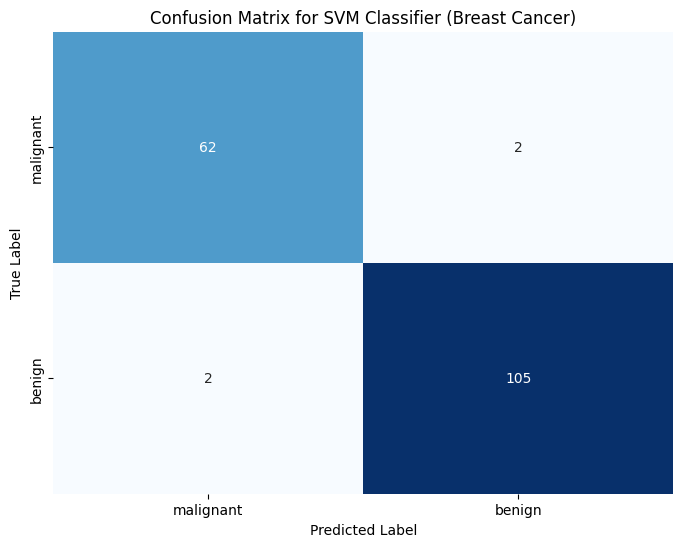


--- Confusion Matrix Interpretation ---
True Negatives (TN): 62 - Correctly predicted 'Malignant' (Class 0).
False Positives (FP): 2 - Incorrectly predicted 'Benign' (Class 1) when it was 'Malignant' (Class 0). (Type I error)
False Negatives (FN): 2 - Incorrectly predicted 'Malignant' (Class 0) when it was 'Benign' (Class 1). (Type II error)
True Positives (TP): 105 - Correctly predicted 'Benign' (Class 1).


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # For beautiful visualizations
from sklearn.datasets import load_breast_cancer # A common classification dataset
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler # Scale data for SVM

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
target_names = cancer.target_names # Class labels: ['malignant', 'benign']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale data (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM Classifier
svm_model = SVC(kernel='rbf', random_state=42) # Using RBF kernel
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Calculate Accuracy (for general context)
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.4f}")

# Compute the Confusion Matrix
# Rows are True labels, columns are Predicted labels
cm = confusion_matrix(y_test, y_pred)
print("\nRaw Confusion Matrix:\n", cm)

# Visualize the Confusion Matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm,
            annot=True,      # Annotate cells with the numeric values
            fmt='d',         # Format annotations as integers
            cmap='Blues',    # Color map
            cbar=False,      # Do not show color bar
            xticklabels=target_names, # Labels for predicted classes (columns)
            yticklabels=target_names) # Labels for true classes (rows)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Classifier (Breast Cancer)')
plt.show()

# --- Interpretation of the Confusion Matrix ---
print("\n--- Confusion Matrix Interpretation ---")
print(f"True Negatives (TN): {cm[0, 0]} - Correctly predicted 'Malignant' (Class 0).")
print(f"False Positives (FP): {cm[0, 1]} - Incorrectly predicted 'Benign' (Class 1) when it was 'Malignant' (Class 0). (Type I error)")
print(f"False Negatives (FN): {cm[1, 0]} - Incorrectly predicted 'Malignant' (Class 0) when it was 'Benign' (Class 1). (Type II error)")
print(f"True Positives (TP): {cm[1, 1]} - Correctly predicted 'Benign' (Class 1).")

44. Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE.

In [25]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# Load California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for SVR)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Reshape y to 2D for scaling
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# Train SVR model
svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(X_train_scaled, y_train_scaled)

# Predict on test data
y_pred_scaled = svr.predict(X_test_scaled)

# Inverse transform the predicted values back to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Mean Absolute Error (MAE): 0.37


45. Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score.

Overall Accuracy: 0.9474
ROC-AUC Score: 0.9901


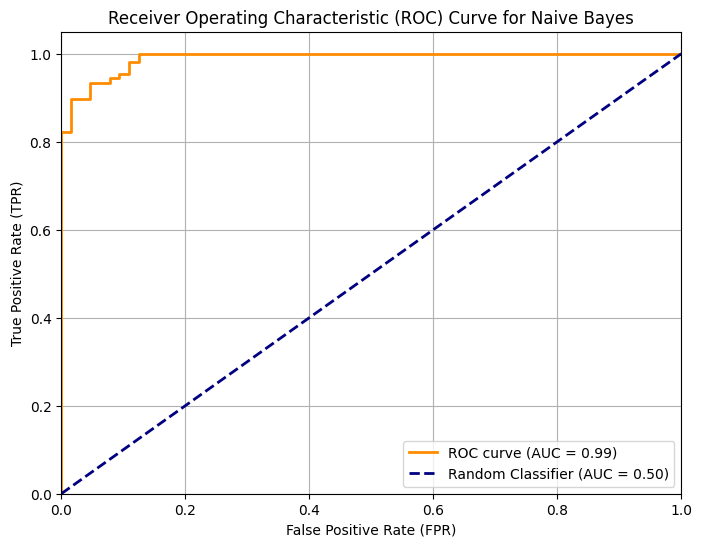


--- Interpretation of ROC-AUC ---
 - The ROC curve visualizes the trade-off between TPR and FPR at various classification thresholds.
 - An AUC closer to 1 indicates a better model, meaning it can distinguish between positive and negative classes well.
 - An AUC of 0.5 means the model performs no better than random guessing.
 - This metric is especially useful for imbalanced datasets because it considers both true positives and false positives across all thresholds.


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer # A binary classification dataset
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes for continuous features
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score
from sklearn.preprocessing import label_binarize # To handle target labels if needed

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
target_names = cancer.target_names # ['malignant', 'benign']

# Split data, ensuring stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train Gaussian Naive Bayes Classifier
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Make predictions (class labels) for general accuracy context
y_pred = gnb_model.predict(X_test)

# Get predicted probabilities for the positive class (class 1, 'benign')
# We need probabilities to calculate ROC-AUC.
# predict_proba returns probabilities for each class: [[prob_class0, prob_class1], ...]
# We want prob_class1 (the second column) for the positive class.
y_pred_proba = gnb_model.predict_proba(X_test)[:, 1]

# Evaluate using Accuracy (for context)
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.4f}")

# Compute ROC-AUC score
# roc_auc_score takes true labels and predicted probabilities of the positive class.
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Compute ROC curve points (False Positive Rate, True Positive Rate, and thresholds)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier (AUC = 0.50)') # Baseline random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("\n--- Interpretation of ROC-AUC ---")
print(" - The ROC curve visualizes the trade-off between TPR and FPR at various classification thresholds.")
print(" - An AUC closer to 1 indicates a better model, meaning it can distinguish between positive and negative classes well.")
print(" - An AUC of 0.5 means the model performs no better than random guessing.")
print(" - This metric is especially useful for imbalanced datasets because it considers both true positives and false positives across all thresholds.")